# Trabalho 2 - Decomposição SVD - Algebra Linear 2 

**Luís Rafael Sena**

**Engenharia eletrônica e de computação/UFRJ**

**Data de Entrega: 20/12/2023**


## Introdução

O presente trabalho foi integralmente desenvolvido em Python, fazendo uso de parte do código do trabalho anterior e conta com a assistência de funções provenientes das bibliotecas matemáticas NumPy e Matplotlib. O objetivo desta pesquisa consiste em analisar a estrutura do código, visando compreender métodos matemáticos da álgebra linear que incorporam o teorema espectral para diversos propósitos, tais como a resolução de sistemas lineares, compressão de imagens, entre outros.

A maioria das funções deste relatório opera com matrizes criadas pela função GerarMatriz( ). Esta função gera matrizes aleatórias com M linhas, N colunas e um rank K específico, o qual será ocultado das demais funções do programa durante a resolução dos problemas. A implementação desta função segue a seguinte regra:


$$A = \sum_{i=1}^{k} \vec{u_i} , \vec{v_i}^t $$

onde $\vec{u_i}$ e $\vec{v_i}$  são vetores gerados aleatóriamente, com tamanhos respectivamente iguais a M e N



#### Cabeçalho com bibliotecas e constantes ajustáveis

In [2]:
import numpy
import matplotlib.pyplot as mp
import matplotlib.image as mpimg

# Constante de limite para facilitar os testes:

limite_visual = 6 # facilita os testes
limite_testes = 100 # para os casos teste nao visiveis
casas_decimais = 5 # para facilitar a visualizacao das matrizes
eps = 1e-8 # constante pra determinar valores menores que esse como zero, afim de evitar erros de precisao
casos_teste = 10000 # determina a quantidade de casos teste para cada tipo de matriz especificada no trabalho


#### Código com as funções principais para a resolução de sistemas lineares usando decomposição SVD

In [3]:
# dados para construcao do grafico
distancias = []
m_n = [] 
ranks = []

def GerarMatriz( m , n , k ) :

    matriz = []
    
    for i in range(m) :
        linha = []
        for j in range(n) :
            linha.append(0)
        matriz.append(linha)

    matriz = numpy.array(matriz)

    for i in range(k) :

        u = numpy.random.randint( -9 , 9 , (m,1) ) 
        v = numpy.random.randint( -9 , 9 , (1,n) ) # gerei o vetor ja transposto

        matriz +=  u * v

    return matriz

def GerarVetor(n) :
    return numpy.random.randint( -9 , 9 , n )

def lista_matriz(A,m,n):

    rank = min(m,n) # O rank eh completo
    for i in range(len(A)) : 
        if A[i] < 1e-12 : # Verifica erro de precisao
            A[i:] = 0 # todos os valores seguintes sao zeros, pois a lista esta ordenada
            rank = i 
            break 
    # A é uma lista das raizes dos autovalores em ordem decrescente

    # Valor singular = Raiz quadrada de um autovalor

    S = numpy.zeros((m,n))
    S[:min(m,n),:min(m,n)] = A * numpy.eye(min(m,n))

    # S eh uma matriz do tamanho da matriz original com os valores singulares na diagonal principal

    return rank, S

def Resposta(matriz,b,printar=True):

    m , n = matriz.shape

    if printar :
        print(f'Matriz com {m} linhas e {n} colunas:\n')
        print(matriz)

        print(f'\nVetor b cujo Ax = b:\n')
        print(b)

    U , A , Vt = numpy.linalg.svd(matriz)
    
    rank , S = lista_matriz(A,m,n)

    matriz_temp = U@S@Vt

    if printar :

        print('\nMatriz ortogonormal U a esquerda:\n')
        print(numpy.around(U,casas_decimais))

        print('\nMatriz diagonal com as raizes dos autovalores em ordem decrescente:\n')
        print(numpy.around(S,casas_decimais))

        print('\nMatriz ortonormal V transposta a direita:\n')
        print(numpy.around(Vt,casas_decimais))

        if rank == min(m,n) :
            print(f'\nO rank da matriz é completo e igual a {min(m,n)}')
        else :
            print(f'\nO rank da matriz é incompleto e igual a {rank}')

    A_inv = []
    for i in A : 
        if ( i == 0 ) : break 
        A_inv.append(1/i)
    A_inv = numpy.array(A_inv)
    
    S_inv = numpy.zeros((n,m))

    for i in range(min(m,n,rank)) :
        S_inv[i][i] = A_inv[i]
        
    x = numpy.transpose(Vt) @ S_inv @ numpy.transpose(U) @ b

    if printar :

        print(f'\nVetor x cujo Ax = b\n')
        print(numpy.around(x,casas_decimais))

    b_temp = matriz @ x

    return ( (matriz,matriz_temp) , (b,b_temp) )

def compare( tuplas ) :

    matriz = tuplas[0][0] 
    matriz_gerada = tuplas[0][1]
    b = tuplas[1][0]
    b_gerado = tuplas[1][1]

    m , n = matriz.shape

    igual_matriz = True 
    for i in range(m) :
        for j in range(n) :
            value = matriz[i][j] - matriz_gerada[i][j] 
            if -eps <= value <= eps : continue #igual
            else : 
                igual_matriz = False 
                break 

    distancia_vetor = numpy.linalg.norm( b_gerado - b )

    return igual_matriz , distancia_vetor

def grafico_mn(listax,listay) :

    mp.title('Norma minima x M/N')
    mp.xlabel('M/N',color='black')
    mp.ylabel('Norma minima',color='black')
    mp.grid(False)
    mp.scatter(listax,listay,color='black')
    #mp.plot([massas[0],massas[-1]],[volumes[0]*distorcao_inicio,a*massas[-1]+b],color='blue')
    #mp.legend(loc=4)
    mp.show()

def grafico_rank(listax,listay) :

    mp.title('Norma minima x Rank/min(m,n)')
    mp.xlabel('Rank/min(m,n)',color='black')
    mp.ylabel('Norma minima',color='black')
    mp.grid(False)
    mp.scatter(listax,listay,color='black')
    #mp.plot([massas[0],massas[-1]],[volumes[0]*distorcao_inicio,a*massas[-1]+b],color='blue')
    #mp.legend(loc=4)
    mp.show()

## Sistemas Lineares

A decomposição SVD será usada para resolver sistemas do tipo $A\vec{x} = \vec{b}$, com A $\in R^{M x N}$, respectivamente, nos seguintes casos:

- com M = N, em que o posto é completo
- com M > N, de posto completo
- com M < N, de posto completo
- com M > N, de posto incompleto

Para solucionar o sistema linear com a decomposição da matriz $A = UΣV^{t}$ de forma que $A\vec{x} = \vec{b}$ é nescessário seguir os seguintes passos:

$ A\vec{x} = \vec{b} $

$ A = UΣV^{t} $

$ UΣV^{t}\vec{x} = \vec{b} $

As matrizes U é ortonormais Q, ou seja, $ Q^{t}Q = I $ 

$ U^{t}UΣV^{t}\vec{x} = U^{t}\vec{b} $

$ ΣV^{t}\vec{x} = U^{t}\vec{b} $

$ Σ^{-1}ΣV^{t}\vec{x} = Σ^{-1}U^{t}\vec{b} $

$ V^{t}\vec{x} = Σ^{-1}U^{t}\vec{b} $

As matrizes V é ortonormais Q, ou seja, $ Q^{t}Q = I $ 

$ VV^{t}\vec{x} = VΣ^{-1}U^{t}\vec{b} $

$ \vec{x} = VΣ^{-1}U^{t}\vec{b} $

$ Σ^{-1} $ é uma operação rápida de se fazer computacionalmente, visto que Σ é uma matriz diagonal, assim a sua inversa é igual a inversa dos elementos na diagonal.

In [4]:
# Sistema M = N com posto completo
M = N = K = numpy.random.randint(2,limite_visual)
temp = Resposta(GerarMatriz(M,N,K),GerarVetor(M))

# Coleta de dados para construcao do grafico
for i in range(casos_teste) :
    M = N = K = numpy.random.randint(2,limite_testes)
    temp2 = compare(Resposta(GerarMatriz(M,N,K),GerarVetor(M),False))

    if temp2[0] == False :
        print(f'A decomposicao SVD nao funcionou no caso teste {i+1}')

    distancias.append(temp2[1])
    m_n.append(M/N)
    ranks.append(K/min(M,N))

Matriz com 4 linhas e 4 colunas:

[[  12   90  -85 -127]
 [ -14 -110    9   68]
 [ -36   33    3   30]
 [ -29  -39   50   97]]

Vetor b cujo Ax = b:

[ 5 -2 -8 -8]

Matriz ortogonormal U a esquerda:

[[-0.73247 -0.1356  -0.50588  0.43496]
 [ 0.4851  -0.65314 -0.57841 -0.05945]
 [ 0.03568  0.62201 -0.62396 -0.47171]
 [ 0.47634  0.41004 -0.14211  0.7647 ]]

Matriz diagonal com as raizes dos autovalores em ordem decrescente:

[[240.52102   0.        0.        0.     ]
 [  0.       81.21528   0.        0.     ]
 [  0.        0.       41.4231    0.     ]
 [  0.        0.        0.        1.35818]]

Matriz ortonormal V transposta a direita:

[[-0.12755 -0.56828  0.37647  0.72046]
 [-0.32958  0.7902   0.34496  0.38468]
 [ 0.6907   0.07357  0.69567 -0.1832 ]
 [ 0.6309   0.21735 -0.50529  0.54717]]

O rank da matriz é completo e igual a 4

Vetor x cujo Ax = b

[ 0.09153 -0.05319  0.05251 -0.10356]


In [5]:
# Sistema M > N com posto completo
M = numpy.random.randint(3,limite_visual)
K = N = numpy.random.randint(2,M)
temp = Resposta(GerarMatriz(M,N,K),GerarVetor(M))

# Coleta de dados para construcao do grafico
for i in range(casos_teste) :
    M = numpy.random.randint(3,limite_testes)
    K = N = numpy.random.randint(2,M)
    temp2 = compare(Resposta(GerarMatriz(M,N,K),GerarVetor(M),False))

    if temp2[0] == False :
        print(f'A decomposicao SVD nao funcionou no caso teste {i+1}')

    distancias.append(temp2[1])
    m_n.append(M/N)
    ranks.append(K/min(M,N))

Matriz com 4 linhas e 3 colunas:

[[ -54  -32   32]
 [ -45  -34   32]
 [ 108  110 -116]
 [  36   28  -12]]

Vetor b cujo Ax = b:

[1 2 1 8]

Matriz ortogonormal U a esquerda:

[[-0.31388 -0.58648 -0.62976 -0.40114]
 [-0.2941  -0.30775 -0.1366   0.8945 ]
 [ 0.87984 -0.44976 -0.09602  0.11988]
 [ 0.20215  0.5992  -0.75863  0.15677]]

Matriz diagonal com as raizes dos autovalores em ordem decrescente:

[[218.89894   0.        0.     ]
 [  0.       24.95405   0.     ]
 [  0.        0.        8.57608]
 [  0.        0.        0.     ]]

Matriz ortonormal V transposta a direita:

[[ 0.60523  0.55956 -0.56621]
 [ 0.74198 -0.13887  0.65588]
 [ 0.28837 -0.81707 -0.49923]]

O rank da matriz é completo e igual a 3

Vetor x cujo Ax = b

[-0.13983  0.65999  0.4899 ]


In [6]:
# Sistema M < N com posto completo
N = numpy.random.randint(3,limite_visual)
K = M = numpy.random.randint(2,N)
temp = Resposta(GerarMatriz(M,N,K),GerarVetor(M))

# Coleta de dados para construcao do grafico
for i in range(casos_teste) :
    N = numpy.random.randint(3,limite_testes)
    K = M = numpy.random.randint(2,N)
    temp2 = compare(Resposta(GerarMatriz(M,N,K),GerarVetor(M),False))

    if temp2[0] == False :
        print(f'A decomposicao SVD nao funcionou no caso teste {i+1}') 

    distancias.append(temp2[1])
    m_n.append(M/N)
    ranks.append(K/min(M,N))


Matriz com 2 linhas e 4 colunas:

[[  6  -3   0  -8]
 [ 40  28  40 -16]]

Vetor b cujo Ax = b:

[-8  6]

Matriz ortogonormal U a esquerda:

[[-0.06827 -0.99767]
 [-0.99767  0.06827]]

Matriz diagonal com as raizes dos autovalores em ordem decrescente:

[[65.26433  0.       0.       0.     ]
 [ 0.       9.46398  0.       0.     ]]

Matriz ortonormal V transposta a direita:

[[-0.61774 -0.42489 -0.61146  0.25295]
 [-0.34397  0.51823  0.28853  0.72793]
 [-0.28131 -0.62479  0.72799  0.02331]
 [ 0.64881 -0.40069 -0.11357  0.63686]]

O rank da matriz é completo e igual a 2

Vetor x cujo Ax = b

[-0.25348  0.49488  0.30679  0.62431]


In [7]:
# Sistema M > N com posto incompleto
M = numpy.random.randint(3,limite_visual)
N = numpy.random.randint(2,M)
K = numpy.random.randint(1,N) 
temp = Resposta(GerarMatriz(M,N,K),GerarVetor(M))

# Coleta de dados para construcao do grafico
for i in range(casos_teste) :
    M = numpy.random.randint(3,limite_testes)
    N = numpy.random.randint(2,M)
    K = numpy.random.randint(1,N) 
    temp2 = compare(Resposta(GerarMatriz(M,N,K),GerarVetor(M),False))

    if temp2[0] == False :
        print(f'A decomposicao SVD nao funcionou no caso teste {i+1}')

    distancias.append(temp2[1])
    m_n.append(M/N)
    ranks.append(K/min(M,N))

Matriz com 3 linhas e 2 colunas:

[[12 12]
 [ 4  4]
 [ 4  4]]

Vetor b cujo Ax = b:

[4 5 0]

Matriz ortogonormal U a esquerda:

[[-0.90453  0.4264   0.     ]
 [-0.30151 -0.6396  -0.70711]
 [-0.30151 -0.6396   0.70711]]

Matriz diagonal com as raizes dos autovalores em ordem decrescente:

[[18.76166  0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]]

Matriz ortonormal V transposta a direita:

[[-0.70711 -0.70711]
 [ 0.70711 -0.70711]]

O rank da matriz é incompleto e igual a 1

Vetor x cujo Ax = b

[0.19318 0.19318]


### **Determinação do Rank de uma Matriz usando SVD**

A determinação do rank completo de uma matriz é uma tarefa crucial na análise de suas propriedades. Esta análise é realizada por meio da aplicação da decomposição em valores singulares (SVD). Para que uma matriz possua rank completo, é imperativo que a quantidade de valores singulares seja idêntica ao menor valor entre o número de linhas e colunas. Se esta condição não for satisfeita, o rank da matriz será considerado incompleto. Destaca-se que a determinação do rank torna-se possível ao observar que a quantidade de valores singulares obtidos durante a decomposição é precisamente equivalente ao rank da matriz. Este método desempenha um papel fundamental na análise da dimensionalidade e das propriedades essenciais da matriz em questão.

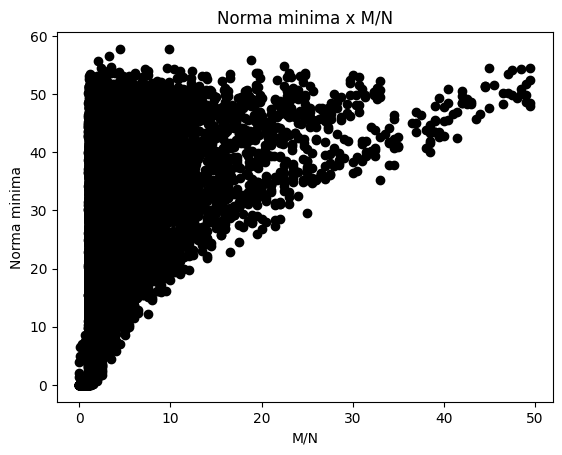

In [8]:
grafico_mn(m_n,distancias)

### **Norma mínima**

É essencial analisar, com base no gráfico apresentado, a relação entre a razão de linhas para colunas $ \frac{M}{N} $ e a distância entre o vetor resposta correto e o vetor resposta encontrado pelo algoritmo. Esta análise permite verificar que, quando $ \frac{M}{N} < 1 $, ou seja, quando $ M < N $, as soluções estão mais próximas da resposta real, ou seja, $ A\vec{x} \approx \vec{b} $. Por outro lado, quando $ M > N $, a distância entre $ A\vec{x} $ e $ \vec{b} $ é consideravelmente maior.

Ademais, é possível notar que o rank da matriz não desempenha um papel de extrema importância na determinação do vetor resposta mais próximo em relação ao vetor resposta real, visto que, mesmo para ranks completos, a distância em relação ao vetor resposta real varia consideravelmente. No entanto, quanto menor a razão de $ \frac{k}{\min(M,N)} $ para uma matriz $ A \in \mathbb{R}^{M \times N} $, lembrando que o rank máximo $ = \min(M,N) $ e o rank $ = k $, maior a distância para o vetor resposta real.


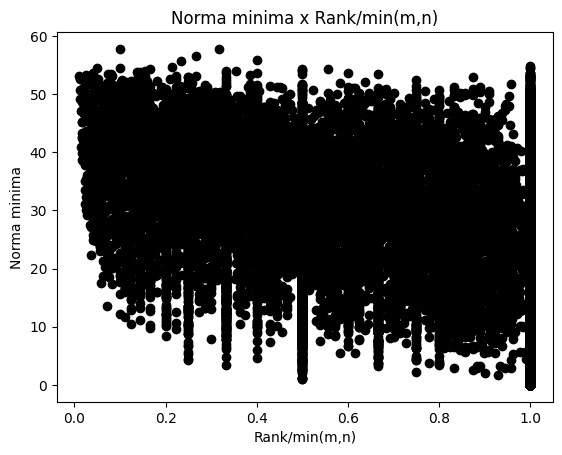

In [9]:
grafico_rank(ranks,distancias)

#### Código com as funções principais para a aproximação de rank reduzido usando decomposição SVD

In [10]:
lena = mpimg.imread('lena.png')

def mostrar(imagem) :
    if len(imagem.shape) == 2 : mp.gray()
    mp.imshow(imagem)
    mp.axis('off')
    mp.show()

def rgb_cinza(imagem):
    return 0.2989*imagem[:,:,0] + 0.5870*imagem[:,:,1] + 0.1140*imagem[:,:,2]
    #Para encontrar a luminância (imagemem níveis de cinza) de cada pixel énecessário usar a seguinte fórmula:
    # Y = 0.2989*R+0.5870*G+0.1140*B

def aproximacao_rank_reduzido(matriz,k) :

    m , n = matriz.shape

    U , A , Vt = numpy.linalg.svd(matriz)

    Ak = numpy.zeros((m,n))
    for i in range(k) :
        Ak += A[i] * numpy.outer( U[:, i] , Vt[i, :] )
        # nao eh nescessario obter o conjulgado complexo de Vt
        # pois a matriz eh composta somente por numeros reais  

    return Ak

def norma_frobenius(A,k) :

    soma = 0 
    for i in range(k) :
        soma += A[i]**2

    return soma**0.5

def grafico_norm(listax,listay) :

    mp.title('||A-Ak||f x k')
    mp.xlabel('k',color='black')
    mp.ylabel('||A-Ak||f',color='black')
    mp.grid(False)
    mp.scatter(listax,listay,color='black')
    #mp.plot([massas[0],massas[-1]],[volumes[0]*distorcao_inicio,a*massas[-1]+b],color='blue')
    #mp.legend(loc=4)
    mp.show()

lena_cinza = rgb_cinza(lena)


## Aproximação de rank reduzido

O restante do relatório usará a seguinte imagem Lena para os testes de compressão:

![lena](lena_cinza.png)

A imagem será interpretada como uma matriz 512x512. A decomposição SVD será usada para gerar aproximações de rank da matriz de forma que a imagem utilize menos informação para ser guardada, comprimindo a informação.

Para a aproximação de rank ser feita, a seguinte fórmula foi utilizada:

$$ A_k = \sum_{i=1}^{k} σ_i \vec{u_i} \vec{v_i}^H $$

Para medir a norma de uma matriz e quantificar a diferença entre a imagem original e a imagem comprimida a  norma de Frobenius foi utilizada de acordo com a seguinte fórmula:

$$ \| A \|_F = \sqrt{\sum_{i}^{} σ_i^2} $$

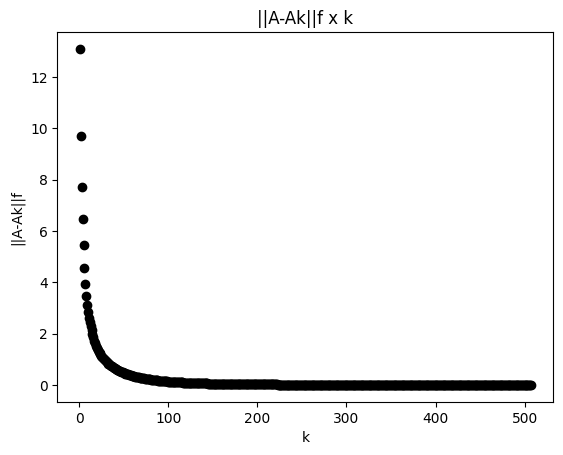

In [11]:
m , n = lena_cinza.shape

U , A , Vt = numpy.linalg.svd(lena_cinza)
rank , S = lista_matriz(A,m,n)

norma_lena_cinza = norma_frobenius(A,rank)

lista_k = []
lista_norma = []
Ak = numpy.zeros((m,n))
soma = 0 
for i in range(0,rank) :
    Ak += A[i] * numpy.outer( U[:, i] , Vt[i, :] ) 
    soma += A[i]**2
    lista_k.append(i+1)
    lista_norma.append(norma_lena_cinza-soma**0.5)
    
grafico_norm(lista_k,lista_norma)

### Observações sobre a norma de frobenius em relação a aproximação de rank reduzido

O Gráfico abaixo facilita a persepção que este é um decaimento hiperbólico, visto pelo formato do gráfico. No gráfico é possível notar que após o decaimento repentino, a taxa de aproximação da imagem compactada em relação a orginial é significamente diminuido, dessa forma uma aproximação de rank significativamente menor que o rank original pode reproduzir uma imagem muito semelhante a original, com menos dados armazenados e com uma qualidade semelhante.

para definir uma qualidade de imagem comprimida aceitável, os valores foram ajustados manualmente de forma que um milésimo da norma de frobenius da matriz original fosse o valor desejado da diferença entre a norma da matriz comprimida e a original, com 190/507 valores singulares

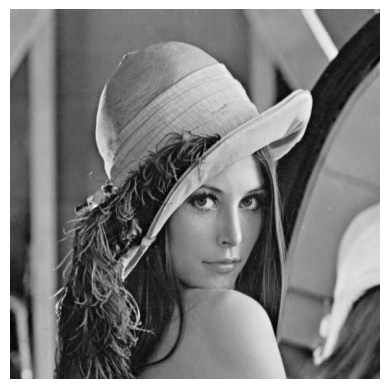

339


In [15]:
for i in range(rank) :
    if norma_lena_cinza-norma_frobenius(A,i) <= 1e-5*norma_lena_cinza:
        mostrar(aproximacao_rank_reduzido(lena_cinza,i))
        print(i)
        break 

#339 - 1e-5
#190 - 1e-4
#71 - 1e-3